# Step1 : Import Librarys

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Step2 : Get Data

In [ ]:
data = np.array([[3, 4],
                 [-1, 2],
                 [0, 1],
                 [-3, -2],
                 [2, -3],
                 [1, 0],
                 [-2, -1]], dtype=float)

# Step3 : Center Data

In [ ]:
def Calculate_Matrix_Mean(Matrix):
    MeanX = 0
    MeanY = 0
    rows, cols = Matrix.shape
    for i in range(rows):
        MeanX += Matrix[i][0]
        MeanY += Matrix[i][1]
    MeanX /= rows
    MeanY /= rows
    return MeanX, MeanY

In [ ]:
def Center_Data(Matrix):
    rows, cols = Matrix.shape
    MeanX, MeanY =  Calculate_Matrix_Mean(data)
    for i in range(rows):
        Matrix[i, 0] = Matrix[i, 0] - MeanX
        Matrix[i, 1] = Matrix[i, 1] - MeanY
    return Matrix

In [ ]:
center_data = Center_Data(data)

In [ ]:
print(center_data)

[[ 3.          3.85714286]
 [-1.          1.85714286]
 [ 0.          0.85714286]
 [-3.         -2.14285714]
 [ 2.         -3.14285714]
 [ 1.         -0.14285714]
 [-2.         -1.14285714]]


# Step4 : Calculate Covariance Matrix

In [ ]:
def Calculate_Covariance_Matrix(Matrix):
    n = Matrix.shape[0]
    return (Matrix.T @ Matrix) / (n - 1)

In [ ]:
covariance_data = Calculate_Covariance_Matrix(center_data)

In [ ]:
print(covariance_data)

[[4.66666667 2.        ]
 [2.         5.80952381]]


# Step5 : Calculate Eigenvalues

In [ ]:
# consider ax2 + bx + c = 0
def Calculate_Eigenvalues(Matrix):
    a = 1
    b = -1 * (Matrix[0, 0] + Matrix[1, 1])
    c = (Matrix[0, 0] * Matrix[1, 1]) - (Matrix[0, 1] * Matrix[1, 0])
    coefficients = [a, b, c]
    return np.roots(coefficients)

In [ ]:
lambda1, lambda2 = Calculate_Eigenvalues(covariance_data)

In [ ]:
print(lambda1, lambda2)

7.318126635032531 3.1580638411579467


# Step6 : Calculate Eigenvectors

In [ ]:
def Calculate_Eigenvector(Matrix, Lambda):
    a = Matrix[0, 0] - Lambda
    b = Matrix[0, 1]
    return 1, -1 * (a / b)

In [ ]:
vector1X, vector1Y = Calculate_Eigenvector(covariance_data, lambda1)
vector2X, vector2Y = Calculate_Eigenvector(covariance_data, lambda2)

In [ ]:
print(vector1X, vector1Y)
print(vector2X, vector2Y)

1 1.325729984182932
1 -0.7543014127543601


# Step7 : Normalize Eigenvectors

In [ ]:
def Normalize_Eigenvectors(VectorX, VectorY):
    Norm = math.sqrt(VectorX**2 + VectorY**2)
    return VectorX/Norm, VectorY/Norm

In [ ]:
vector1X_norm, vector1Y_norm = Normalize_Eigenvectors(vector1X, vector1Y)
vector2X_norm, vector2Y_norm = Normalize_Eigenvectors(vector2X, vector2Y)

In [ ]:
print(vector1X_norm, vector1Y_norm)
print(vector2X_norm, vector2Y_norm)

0.6021955131444527 0.7983486481160279
0.7983486481160276 -0.6021955131444531


# Step8 : Form the transformation Matrix P

In [ ]:
p = np.array([[vector1X_norm, vector2X_norm],
                 [vector1Y_norm, vector2Y_norm]], dtype=float)

In [ ]:
print(p)

[[ 0.60219551  0.79834865]
 [ 0.79834865 -0.60219551]]


# Step9 : Calculate Principal Components

In [ ]:
data_transformed = center_data @ p

In [ ]:
print(data_transformed)

[[ 4.88593133  0.07229182]
 [ 0.88045198 -1.91671174]
 [ 0.68429884 -0.51616758]
 [-3.51733364 -1.10462699]
 [-1.30470472  3.48931177]
 [ 0.48814571  0.88437658]
 [-2.11678948 -0.90847385]]


# Step10 : Interpret the PCA

In [ ]:
def Calculate_Variance(data):
    if len(data) < 2:
        raise ValueError("Variance requires at least two data points")

    mean = sum(data) / len(data)
    squared_diffs = [(x - mean) ** 2 for x in data]
    variance = sum(squared_diffs) / (len(data) - 1)
    return variance

In [ ]:
def Get_Columns(matrix):
    x1 = []
    x2 = []
    for row in matrix:
        x1.append(row[0])
        x2.append(row[1])
    return x1, x2

In [ ]:
x1, x2 = Get_Columns(center_data)
xb1, xb2 = Get_Columns(data_transformed)
print(f'first column variance : {Calculate_Variance(x1)}')
print(f'second column variance : {Calculate_Variance(x2)}')
print(f'first transformed column : {Calculate_Variance(xb1)}')
print(f'second transformed column : {Calculate_Variance(xb2)}')

first column variance : 4.666666666666667
second column variance : 5.80952380952381
first transformed column : 7.31812663503253
second transformed column : 3.158063841157947


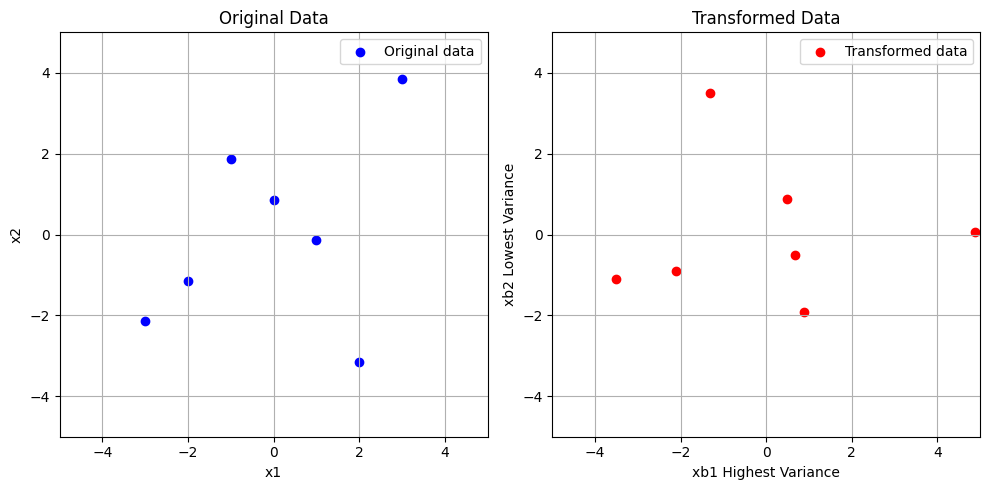

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(x1, x2, color='blue', label='Original data')
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 5)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Original Data')
axes[0].grid(True)
axes[0].legend()

axes[1].scatter(xb1, xb2, color='red', label='Transformed data')
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-5, 5)
axes[1].set_xlabel('xb1 Highest Variance')
axes[1].set_ylabel('xb2 Lowest Variance')
axes[1].set_title('Transformed Data')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# Step11 : Dimension Reduction

In [ ]:
print(xb1)

[4.885931325023751, 0.8804519762138848, 0.6842988412423097, -3.5173336425391324, -1.3047047249328965, 0.4881457062707345, -2.1167894812786514]
